In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import seaborn as sns
from tqdm import tqdm
import os

### Plot 1 - Informativity variability across feature systems

In [ ]:
# Load the CSV once (though not used in plot, as per prompt)
df = pd.read_csv('phonemic_inventories/pb_languages_formatted.csv')
languages = df['language'].apply(lambda x: x.replace(" or ", "/"))

# Inventories and colors
inventories = ['HC', 'SPE', 'JFH']
colors = ['red', 'green', 'blue']

# Create plot1 folder if it doesn't exist
os.makedirs('plot1', exist_ok=True)

# Collect all unique features
all_features = set()
for inv in inventories:
    with open(f'data_all_languages_{inv}_features.json', 'r') as file:
        loaded_dict = json.load(file)
    
    for lang, data in loaded_dict.items():
        all_features.update(data['min_lengths'].keys())

# For each unique feature, plot and save
for feature in sorted(all_features):
    # Plot setup
    plt.figure(figsize=(10, 6))

    # Collect data for all inventories
    all_lengths = {}
    for inv in inventories:
        with open(f'data_all_languages_{inv}_features.json', 'r') as file:
            loaded_dict = json.load(file)
        
        lengths = []
        for lang, data in loaded_dict.items():
            if feature in data['min_lengths']:
                lengths.append(data['min_lengths'][feature])
        
        all_lengths[inv] = lengths

    # Get unique classes (minimal description lengths), sorted ascending
    all_classes = sorted(set(length for lengths in all_lengths.values() for length in lengths))

    # Bar width and positions
    width = 0.25
    x = np.arange(len(all_classes))

    # Plot bars for each inventory
    for i, inv in enumerate(inventories):
        lengths = all_lengths[inv]
        values = Counter(lengths)
        counts = [values.get(cls, 0) for cls in all_classes]
        plt.bar(x + i * width, counts, width=width, color=colors[i], label=inv)

    # Add labels and legend
    plt.xlabel('Minimal Description Length')
    plt.ylabel('Count of Languages')
    plt.title(f'Feature "{feature}"')
    plt.xticks(x + width, all_classes)
    plt.legend()
    
    # Save the plot
    plt.savefig(f'plot1/{feature}.png')
    plt.close()  # Close to free memory

In [15]:
print(len([line.strip() for line in open(f'feature_sets/HC_features.txt')][0].split('\t')))
print(len([line.strip() for line in open(f'feature_sets/SPE_features.txt')][0].split('\t')))
print(len([line.strip() for line in open(f'feature_sets/JFH_features.txt')][0].split('\t')))

23
25
15


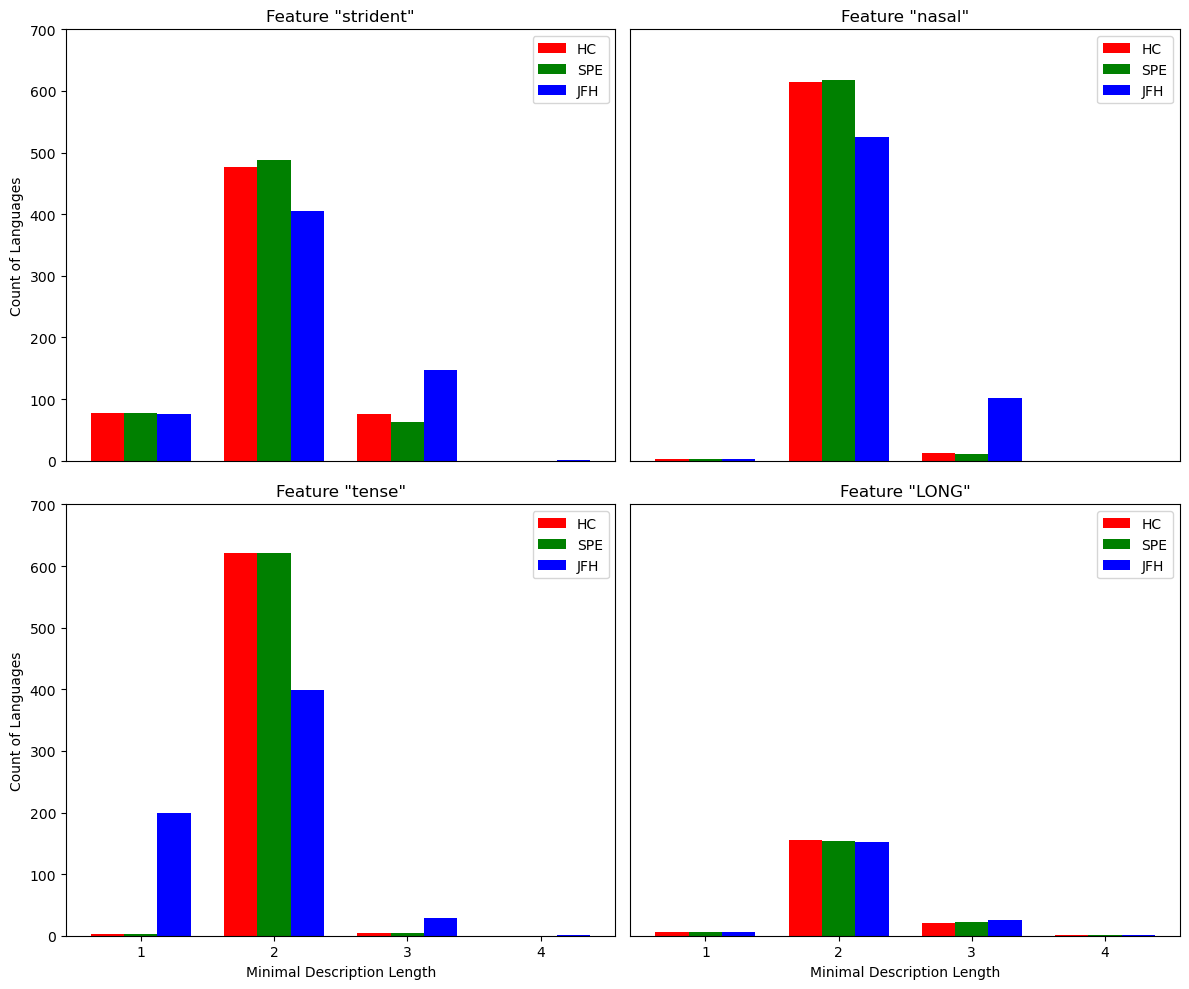

In [22]:
# Features to plot
features = ["strident", "nasal", "tense", "LONG"]

# Inventories and colors
inventories = ['HC', 'SPE', 'JFH']
colors = ['red', 'green', 'blue']

# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Fixed x-axis: integers from 1 to 4
all_classes = [1, 2, 3, 4]
x = np.arange(len(all_classes))
width = 0.25

for feature in features:
    # Collect data for this feature
    all_lengths = {}
    for inv in inventories:
        with open(f'data_all_languages_{inv}_features.json', 'r') as file:
            loaded_dict = json.load(file)
        
        lengths = []
        for lang, data in loaded_dict.items():
            if feature in data['min_lengths']:
                lengths.append(data['min_lengths'][feature])
        
        all_lengths[inv] = lengths

# Now plot
for ax, feature in zip(axs.flat, features):
    # Collect data for this feature (recompute or store, but recomputing for simplicity)
    all_lengths = {}
    for inv in inventories:
        with open(f'data_all_languages_{inv}_features.json', 'r') as file:
            loaded_dict = json.load(file)
        
        lengths = []
        for lang, data in loaded_dict.items():
            if feature in data['min_lengths']:
                lengths.append(data['min_lengths'][feature])
        
        all_lengths[inv] = lengths

    # Plot bars for each inventory
    for i, inv in enumerate(inventories):
        lengths = all_lengths[inv]
        values = Counter(lengths)
        counts = [values.get(cls, 0) for cls in all_classes]
        ax.bar(x + i * width, counts, width=width, color=colors[i], label=inv)

    # Add labels and legend
    ax.set_xlabel('Minimal Description Length')
    ax.set_ylabel('Count of Languages')
    ax.set_title(f'Feature "{feature}"')
    ax.set_xticks(x + width, all_classes)
    ax.legend()

    # Set same y-axis range
    ax.set_ylim(0, 700)

# Remove x-axis labels and ticks for top row
axs[0,0].set_xlabel('')
axs[0,0].set_xticklabels([])
axs[0,0].set_xticks([])
axs[0,1].set_xlabel('')
axs[0,1].set_xticklabels([])
axs[0,1].set_xticks([])

# Remove y-axis labels and ticks for second column
axs[0,1].set_ylabel('')
axs[0,1].set_yticklabels([])
axs[0,1].set_yticks([])
axs[1,1].set_ylabel('')
axs[1,1].set_yticklabels([])
axs[1,1].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import sys
import os

def load_feature_informativity(filepath, phoneme_inventory=None):phoneme_inventory=None):phoneme_inventory=None):
    """
    Load feature informativity data from a filermativity data from a filermativity data from a file
    
    Args:
        filepath: Path to feature system file file file
        phoneme_inventory: Set of phonemes to filter by (if None, use all phonemes)of phonemes to filter by (if None, use all phonemes)of phonemes to filter by (if None, use all phonemes)
    """
    feature_info = {}}}
    with open(filepath, 'r', encoding='utf-8') as f:::
        for line in f:
            parts = line.strip().split()plit()plit()
            if len(parts) >= 2: 2: 2:
                feature = parts[0] = parts[0] = parts[0]
                try:                try:                try:
                    informativity = float(parts[1])
                    # Only include features relevant to the phoneme inventory             # Only include features relevant to the phoneme inventory             # Only include features relevant to the phoneme inventory
                    if phoneme_inventory is None or feature in phoneme_inventory:
                        feature_info[feature] = informativity                    feature_info[feature] = informativity                    feature_info[feature] = informativity
                except ValueError:       except ValueError:       except ValueError:
                    continue
    return feature_info

def get_phonemic_inventory(csv_path, language):e):e):
    """
    Extract the phonemic inventory for a given language from a CSV fileExtract the phonemic inventory for a given language from a CSV fileExtract the phonemic inventory for a given language from a CSV file
    
    Args:
        csv_path: Path to the CSV file containing phonemic inventories    csv_path: Path to the CSV file containing phonemic inventories    csv_path: Path to the CSV file containing phonemic inventories
        language: Language to extract inventory fornventory fornventory for
    
    Returns:
        Set of phonemes for the language    Set of phonemes for the language    Set of phonemes for the language
    """
    try:
        df = pd.read_csv(csv_path)
        language_row = df[df.iloc[:, 0] == language] = df[df.iloc[:, 0] == language] = df[df.iloc[:, 0] == language]
        
        if len(language_row) == 0:
            print(f"Warning: Language '{language}' not found in inventory file")}' not found in inventory file")}' not found in inventory file")
            return None
                            
        inventory = language_row['core inventory'].iloc[0]w['core inventory'].iloc[0]w['core inventory'].iloc[0]
        # Convert string representation of inventory to a set of phonemesstring re resentation of invent ry  o  seofphonemes Convert string representation of inventory to a set of phonemes
        phonemes = set(p.strip() for p in inventory.split())n inventory.split())
        return phonemes
    except Exception as e:
        print(f"Error loading phonemic inventory: {e}")emic inventory: {e}")
        return None

def plot_feature_informativity_comparison(language, feature_systems, phonemic_inventory_path):e, feature_systems, phonemic_inventory_path):
    """
    Create a histogram comparing feature informativity across different feature systemsCreate a histogram comparing feature informativity across different feature systems
    
    Args:Args:
        language: The language to analyze to analyze
        feature_systems: Dictionary mapping feature system names to their data filepathsonary mapping feature system names to their data filepaths
        phonemic_inventory_path: Path to the CSV file with phonemic inventoriesntory_path: Path to the CSV file with phonemic inventories
    """
    # Get phonemic inventory for the target languagey for the target language
    phoneme_inventory = get_phonemic_inventory(phonemic_inventory_path, language)onemic_inventory(phonemic_inventory_path, language)
    
    if phoneme_inventory is None:ry is None:
        print(f"Cannot proceed without phonemic inventory for {language}")   print(f"Cannot proceed without phonemic inventory for {language}")
        return    return
        
    print(f"Loaded {len(phoneme_inventory)} phonemes for {language}")
    
    # Set up the figure with a specific size
    plt.figure(figsize=(14, 8)) 8))
    
    # Color palette for the different feature systems feature systems
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']', '#ff7f0e', '#2ca02c']
    
    # Load data for each feature systemach feature system
    all_features = set()
    feature_data = {}
    
    for i, (system_name, filepath) in enumerate(feature_systems.items()):for i, (system_name, filepath) in enumerate(feature_systems.items()):
        if not os.path.exists(filepath):ath.exists(filepath):
            print(f"Warning: File not found: {filepath}")int(f"Warning: File not found: {filepath}")
            continue            continue
            
        feature_info = load_feature_informativity(filepath, phoneme_inventory)honeme_inventory)
        feature_data[system_name] = feature_info    feature_data[system_name] = feature_info
        all_features.update(feature_info.keys())
    
    # Prepare data for plotting
    plot_data = []
    for feature in sorted(all_features):
        for system_name in feature_systems.keys():   for system_name in feature_systems.keys():
            if system_name in feature_data and feature in feature_data[system_name]:        if system_name in feature_data and feature in feature_data[system_name]:
                plot_data.append({
                    'Feature': feature,
                    'Informativity': feature_data[system_name][feature],
                    'Feature System': system_name
                })
    
    df = pd.DataFrame(plot_data)
    
    if len(df) == 0:
        print("No matching features found to plot")
        return
    
    # Create grouped histogram
    sns.set_style("whitegrid")
    ax = sns.barplot(
        x='Feature', 
        y='Informativity', 
        hue='Feature System', 
        data=df,
        palette=colors
    )
    
    # Customize the plot
    plt.title(f'Feature Informativity Comparison for {language}', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Informativity', fontsize=14)
    plt.xticks(rotation=90)
    
    # Adjust layout for feature names
    plt.tight_layout()
    
    # Save the figure
    plt.ylabel('Informativity', fontsize=14)
    plt.xlabel('Features', fontsize=14)
    plt.title(f'Feature Informativity Comparison for {language}', fontsize=16)
    # Customize the plot
    
    )
        palette=colors
        data=df,
        hue='Feature System', 
        y='Informativity', 
        x='Feature', 
    ax = sns.barplot(
    sns.set_style("whitegrid")
    # Create grouped histogram
    
        return
        print("No matching features found to plot")
    if len(df) == 0:
    
    df = pd.DataFrame(plot_data)
    
                })
                    'Feature System': system_name
                    'Informativity': feature_data[system_name][feature],
                    'Feature': feature,

KeyboardInterrupt: 

### Plot 2 - Avg. informativity variability cross-linguistically

In [71]:
def readinventory(filename):
    """Read phoneme inventory and store in a dictionary."""
    featdict = {}
    allsegments = set()

    lines = [line.strip() for line in open(f'feature_sets/{filename}_features.txt')]
    fields = lines[0].split()
    for f in fields:
        featdict[f] = {}
        featdict[f]['name'] = f # name of the feature
        featdict[f]['+'] = set() # phonemes with a + for that feature
        featdict[f]['-'] = set() # phonemes with a - for that feature
    for i in range(1, len(lines)):
        thisline = lines[i]
        if len(thisline) == 0:
            continue
        linefields = thisline.split()
        if len(linefields)!= len(fields) + 1 :
            print(f"Field length mismatch on line {i+1}")
            quit()
        phoneme = linefields[0]
        allsegments |= {phoneme}
        for j in range(1,len(linefields)):
            if linefields[j] == '+' or linefields[j] == '-':
                featdict[fields[j-1]][linefields[j]] |= {phoneme}

    return featdict, allsegments

def reccheck(fd, basefeats, basemodes, feats, modes, correct, baseindex):
    """
    Start with an empty set of features and keep adding features one by one with different starting phonemes, generating all possible unique feature combinations.
    Check if the generated feature combinations are natural classes for the given phoneme.
    """

    def store_feats(fd, feats, modes):
        """Store features for one solution in dictionary indexed by length."""
        global solutions
        length = len(feats)
        if length not in solutions:
            solutions[length] = []
        thissol = []
        for idx, feat in enumerate(feats):
            thissol.append(modes[idx] + fd[feat]['name'])
        solutions[length].append('[' + ','.join(thissol) + ']')
            
    def check_feats(fd, feats, modes, correct):
        """Check if proposed feature combination is a valid solution."""
        newbase = allsegments 
        # newbase = set(str(p) for p in correct) 
        for idx, feat in enumerate(feats):
            mode = modes[idx]
            newbase = newbase & fd[feat][mode]
        if newbase != correct:
            return False
        return True
        
    global maxlen
    if len(feats) > maxlen: # Bound the search (max: total amount of features)
        return
    if check_feats(fd, feats, modes, correct): # New solution
        store_feats(fd, feats, modes) # if proposed feature combination is a natural class, store solution
        if len(feats) < maxlen:
            maxlen = len(feats)
    numelem = len(basefeats)
    # This for loop iterates over all possible indeces and generates all possible feature combinations
    for i in range(baseindex, numelem):  # Add one feature
        if basefeats[i] not in feats:    # If we didn't add this already
            reccheck(fd, basefeats, basemodes, feats + [basefeats[i]], modes + [basemodes[i]], correct, i + 1)
    return

def get_general_info_natural_classes(natural_classes, keys):
    """Get descriptive information for the given natural classes"""

    min_lengths = {} # store the length of the minimal description where each feature is included
    min_lengths_phonemes = {}
    avg_lengths = {key: [0,0] for key in keys} # store the average lengths of all descriptions per phoneme

    for phoneme in natural_classes:
        for sublist in natural_classes[phoneme]:
            sublist = sublist.strip("[]").split(',')
            # Iterate through each unique value
            for value in sublist:
                value = value.strip('+') # remove + symbols
                value = value.strip('-') # remove - symbols
                # Check if the value already exists in the dictionary
                if value in min_lengths:
                    # If the length of the current sublist is smaller than the stored length,
                    # update the stored length
                    min_lengths[value] = min(min_lengths[value], len(sublist))
                else:
                    # If the value doesn't exist in the dictionary, add it with the length
                    min_lengths[value] = len(sublist)

                if value in avg_lengths:
                    avg_lengths[value][0] += len(sublist)
                    avg_lengths[value][1] += 1
            
            if phoneme in min_lengths_phonemes:
                min_lengths_phonemes[phoneme] = min(min_lengths_phonemes[phoneme], len(sublist))
            else: 
                min_lengths_phonemes[phoneme] = len(sublist)
                        
    avg_lengths = {k: v[0] / v[1] if v[1] != 0 else 0 for k, v in avg_lengths.items()}

    min_descriptions = {} # store the minimal descriptions of each phoneme
    # get all minimal descriptions per phoneme
    for phoneme in natural_classes:
        if phoneme not in min_descriptions:
            min_descriptions[phoneme] = []

        for sublist in natural_classes[phoneme]:
            sublist = sublist.strip("[]").split(',')
            if min_lengths_phonemes[phoneme] == len(sublist):
                min_descriptions[phoneme].append(sublist)

    count_phoneme = {} # The number of times the feature is included in the minimal description of a phoneme
    count_lengths = {} # Count of minimal descriptions for various lengths
    # count features in minimal descriptions          
    for phoneme in min_descriptions:
        for sublist in min_descriptions[phoneme]:
            for value in sublist:
                value = value.strip('+') # remove + symbol
                value = value.strip('-') # remove - symbol
                if value in count_phoneme:
                    count_phoneme[value] += 1
                else:
                    count_phoneme[value] = 1
    
            if len(sublist) in count_lengths:
                count_lengths[len(sublist)] += 1
            else:
                count_lengths[len(sublist)] = 1
    
    return min_lengths, min_descriptions, count_phoneme, avg_lengths, count_lengths

# Configuration
INVENTORY = 'SPE'
NUM_SAMPLES = 3

# Read the language data
languages_df = pd.read_csv('phonemic_inventories/pb_languages_formatted.csv')

# Step 1: Collect all unique phonemes from all languages
all_phonemes = set()
for idx, row in languages_df.iterrows():
    inventory = row['core inventory']
    if pd.notna(inventory):
        phonemes = [p.strip().replace("'", "") for p in str(inventory).split(',')]
        all_phonemes.update(phonemes)

phoneme_pool = list(all_phonemes)
print(f"Total unique phonemes in pool: {len(phoneme_pool)}")


# Step 3: Load feature system
fd, allsegments = readinventory(INVENTORY)

# Step 4: Process each language and generate random samples
results = []

all_languages = {}
for idx, row in languages_df.iterrows():
    language = row['language'].replace("/", " or ")
    print(f"Processing language {idx + 1}/{len(languages_df)}: {language}")

    family = row['family']
    inventory = row['core inventory']
    inventory = inventory.strip("[]").split(',')
    inventory = [phon.strip().replace("'", "") for phon in inventory]
    inventory = [phon for phon in inventory if phon != '']
    allsegments = set(inventory) # set of all phonemes in the inventory


    # Get phonemes in this language's inventory
    inventory_size = len(allsegments)
    
    # Generate 100 random languages of the same size
    sample_avg_lengths = []

    for sample_num in range(NUM_SAMPLES):
        # Sample N phonemes from the pool
        sampled_phonemes = np.random.choice(phoneme_pool, size=inventory_size, replace=False)
        # convert sampled_phonemes (np.ndarray of numpy.str_) to a Python set of str
        sampled_phonemes = set({str(x) for x in sampled_phonemes})
        allsegments = sampled_phonemes
        print(f"Sampled phonemes: {allsegments}")

        features = [f for f in fd] # list of all features in the selected feature system

        minimal_natural_classes = []
        minimal_natural_classes_perphoneme = {}
        natural_classes = []
        natural_classes_perphoneme = {}
        for testset in allsegments: # iterate through all phonemes in the inventory
            print(f'Testset: {testset}')
            base = allsegments
            feats, modes = [], [] # list with featres, list with signs for each feature
            before = testset
            testset = {testset}

            # Iterate over all features to find:
                # base: list of phonemes that are described by the same features as the given test phoneme
                # feats: list of features that describe the given phoneme
                # modes: list with the respective signs of the features describing the given phoneme
            for feat in features:
                if testset <= fd[feat]['+']: # test whether testset is a subset of fd[feat]['+']
                    # fd[feat]['+']: set of phonemes that have the feature feat with sign + 
                    base = base & fd[feat]['+'] # returns intersection between the two sets (those elements that are in both sets)
                    feats.append(feat)
                    modes.append('+')
                elif testset <= fd[feat]['-']:
                    # fd[feat]['-']: set of phonemes that have the feature feat with sign - 
                    base = base & fd[feat]['-']
                    feats.append(feat)
                    modes.append('-')

            solutions = {}
            print(f'Base set: {base}, Test set: {testset}')
            # Check if the procedure above has resulted in the phoneme being tested (i.e. we have the correct general feature description and it is a natural class)
            if base == testset: 
                maxlen = len(feats)
                reccheck(fd, feats, modes, [], [], base, 0)
                for s in solutions.values():
                    for a in s:
                        natural_classes.append(a) 
                        if list(testset)[0] in natural_classes_perphoneme:
                            natural_classes_perphoneme[list(testset)[0]].append(a)
                        else: 
                            natural_classes_perphoneme[list(testset)[0]] = []
                minsol = min(solutions.keys())
                for s in solutions[minsol]:
                    print(s)
                    minimal_natural_classes.append(s)
                    if list(testset)[0] in minimal_natural_classes_perphoneme:
                        minimal_natural_classes_perphoneme[list(testset)[0]].append(s)
                    else: 
                        minimal_natural_classes_perphoneme[list(testset)[0]] = []
                        
        min_lengths, min_descriptions, count_phoneme, avg_lengths, count_lengths = get_general_info_natural_classes(natural_classes_perphoneme, list(fd.keys()))

        # Compute average avg_length for this sampled language
        total_avg_length = 0
        feature_count = 0
        
        for phoneme in allsegments:
            # compute minimal feature descriptions
            feature_descriptions = min_descriptions[phoneme]
            unique_features = set(item for sublist in feature_descriptions for item in sublist)
            for feature in unique_features:
                if feature in min_lengths:
                    total_avg_length += min_lengths[feature]
                    feature_count += 1
        
        if feature_count > 0:
            avg_for_sample = total_avg_length / feature_count
            sample_avg_lengths.append(avg_for_sample)
            print(f"  Sample {sample_num + 1}/{NUM_SAMPLES}: avg MDL = {avg_for_sample:.4f}")

    # Average over all 100 samples for this language size
    if sample_avg_lengths:
        mean_avg_length = np.mean(sample_avg_lengths)
        results.append(mean_avg_length)
        print(f"Language {idx + 1} (size {inventory_size}): avg MDL = {mean_avg_length:.4f}")


# Step 5: Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(results, bins=30, kde=True, stat='density')
plt.xlabel('Average Minimal Description Length')
plt.ylabel('Density of Languages')
plt.title(f'Distribution of Average MDL for Random Languages ({INVENTORY} features)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'random_languages_mdl_distribution_{INVENTORY}.png', dpi=300)
plt.show()

print(f"\nOverall statistics:")
print(f"Mean: {np.mean(results):.4f}")
print(f"Std: {np.std(results):.4f}")
print(f"Min: {np.min(results):.4f}")
print(f"Max: {np.max(results):.4f}")

Total unique phonemes in pool: 1058
Processing language 1/629: !Xóõ
Sampled phonemes: {'zʼ', 'aː', 'r̟ʲ', 'xʷ', 'ǂx', 'mǃG', 'ɲʰ', 'mʲ', 'ʀ', 'oj', 'ɯə', 'cˤ', 'pː', 'sː', 'ʔl', 'jʼ', 't̪ː', 'ɲ̥ʰ', 'iː', 'a', 'ʔǂn', 'θ', 'ǃx', 'ẽ', 'ṵ', 'ɲ̥ʃ', 'ɪ̘', '\\uf180p', 'aʊ', 'ɬʼ', '[b', 'ɐː', 'ðˤ', 'ʈⁿ', 'nʷ', 'ɗ', 'ⁿtsʼ', '\\uf180t', 'rˤː', 'ǃʔ', '[pʼ', 'ɔ̝ː', 's̻', 'wˤ', 'ɺ', 'ⁿtɬ', 'oʔ', 'l̪ː', 't̻ɕʼ', 'rˤ', 'tɬʼ', 'ʃʼʷ', 'rː', 'eɪ', 'ǃr', 'v̤', 'ɬʷ', 'mʷ', 'uːː', 'cʰ', 'ɟʑ', '\\uf180pʼ', 'ʌ̝', 'tʼ', 'tç', 'ɨ̃', 'b͡ɗ', 'tɕ', 'ã̤', 't̪ʰ', 'v̌', 'e̤ː', 'c\\uf181', 'ʂʰ', 'p͡ts', 'ǃʰ', 'sʷ', 'ʘx', 'ʃʷ', 'vˤ', 'r̪', 'ʒ͡ɣw', 'ʔd', 'ǃn', 's̪v', 's̪ʲ', 'ui', 'uˤ', 'r̪ʲ', 'ɡ̂', 'mǁG', '\\uf180ɬ', 's͡kʷ', 'y', 'cçʰ', 's̪ː', 'j̃', 'ðˠ', 'ə̝', 'ʃ', 'd', 'nkǀ', 'ɢˤ', 'ɳɖɽ', 'kʼʷ', 's̪ˤː', 'ʑ', 'tsx', 't', 'ⁿʃ', 'd̪z̪ʷ', 'k̀', 'ã̤ˤ', 'lʷ', 'ɠʲ', '\\uf182ɡ͡b', 'ɲ͡ŋw', 'i̥', 'zʷ', 'ɦ̃', 'ŋʰ', 'i̺', 'ʒʷ', 'dβ', 'tʂ', 'i̯e', 'tlʼ', 'ʕ', 'ɬ', 'bˤ', 'a+', 'xʲ', 'dʼ', 'z̤', 'b͡ʝ', 'vʷ', 'u̞', 'r͡ɣw', 'ʈʂʼ',

KeyboardInterrupt: 